In [7]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt

from data_prep_funcs import get_polygon_extremes
import math

Extreme values are  ([31.20268, 31.5128083], [3.1833812, 3.5854929])
Extreme distance is  51.46549330180716


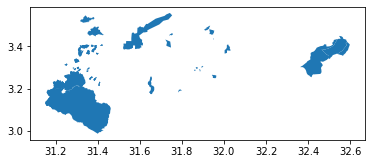

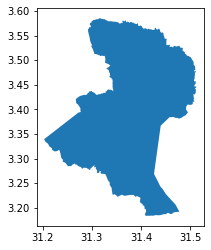

In [8]:
all_camps = geopandas.read_file("../input_files/adm_boundaries/hotosm_uga_rr_refugee_camps_polygons.shp")
all_camps.plot()
bidibidi = geopandas.read_file("../input_files/adm_boundaries/camp_polygon.shp")
bidibidi.plot()

extremes = get_polygon_extremes(bidibidi.geometry[0])
print("Extreme values are ",extremes)

def compute_distance(lata,latb,lona,lonb):
    R = 6373

    lata = math.radians(lata)
    lona = math.radians(lona)
    latb = math.radians(latb)
    lonb = math.radians(lonb)

    dlat = lata-latb
    dlon = lona-lonb

    a = math.sin(dlat / 2)**2 + math.cos(lata) * math.cos(latb) * math.sin(dlon / 2)**2

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance = R*c

    return distance

distance = compute_distance(extremes[0][0],extremes[0][1],extremes[1][0],extremes[1][1])
print("Extreme distance is ",distance)

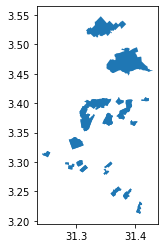

In [93]:
all_zones = geopandas.sjoin(all_camps,bidibidi,op='within')
all_zones = all_zones.drop(columns=["index_right"]) # 
all_zones.plot()

Text(0.5, 1.0, '81534 buildings')

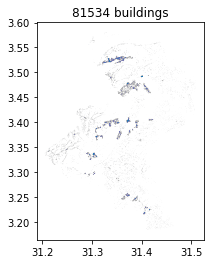

In [3]:
# Reading, plotting and counting the buildings within the camp's perimeters 
buildings_in_district = geopandas.read_file("../input_files/building_polygons/rr_within.shp")
buildings_in_district.plot()
plt.title("%s buildings"%len(buildings_in_district))

Text(0.5, 1.0, '73192 buildings')

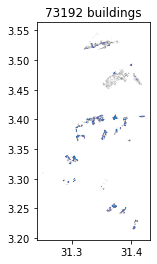

In [119]:
# Spatial join, plot and count of the buildings within the zones' perimeters 
all_zones_joined = geopandas.sjoin(buildings_in_district,all_zones)
all_zones_joined.to_file("../input_files/building_polygons/all_zones.shp")
all_zones_joined.plot()
plt.title("%s buildings"%len(all_zones_joined))

In [117]:
# Create separate geodataframes for every zone 
for zindex in range(1,6): 
    tmp_gdf = all_zones[all_zones.name == "Zone 0%s"%zindex]
    joined_tmp = geopandas.sjoin(buildings_in_district, tmp_gdf);
    joined_tmp.to_file("../input_files/building_polygons/per_zone/zone_%s.shp"%zindex);

In [118]:
# Count and list the number of buildings per zone 
for index in range(1,6): 
    tmp = geopandas.read_file("../input_files/building_polygons/per_zone/zone_%s.shp"%index)
    print("Zone ",index," counts ",len(tmp)," buildings")

Zone  1  counts  13134  buildings
Zone  2  counts  10148  buildings
Zone  3  counts  25096  buildings
Zone  4  counts  8276  buildings
Zone  5  counts  16538  buildings


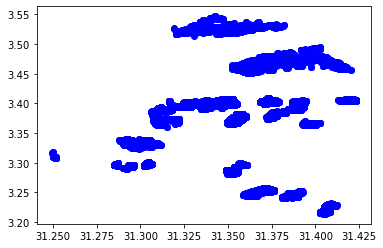

In [7]:
from data_prep_funcs import buildings_shp_to_df
import matplotlib.pyplot as plt

buildings_df = buildings_shp_to_df(address_of_shp="../input_files/building_polygons/all_zones.shp")
buildings_df.to_csv("save_files/buildings_all_zones_df.csv")

for i in range(len(buildings_df)):
    plt.plot(buildings_df.x[i],buildings_df.y[i],'bo')

Text(129.49443164270627, 0.5, 'Longitude')

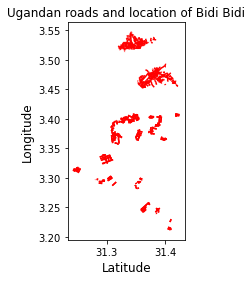

In [123]:
from data_prep_funcs import roads_within_polygon
import seaborn 

roads_intersect, roads_within = roads_within_polygon(address_of_road_shp="../input_files/roads/hotosm_uga_roads_lines.shp",
                                                      polygon=all_zones)
seaborn.set_context( rc={"axes.labelsize":12})
fig,ax = plt.subplots()
roads_within.plot(ax=ax,color='red')
plt.title("Ugandan roads and location of Bidi Bidi")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

In [4]:
# Save the results from joining roads to the zone polygons
roads_intersect.to_file("../input_files/roads/roads_all_zones_intersect.shp")
roads_within.to_file("../input_files/roads/roads_all_zones_within.shp")

NameError: name 'roads_intersect' is not defined

In [1]:
from data_prep_funcs import make_grid_gdf, get_polygon_extremes
import geopandas 

bidibidi = geopandas.read_file("../input_files/adm_boundaries/camp_polygon.shp")

extr_x,extr_y = get_polygon_extremes(bidibidi.geometry[0])
print("Extreme x values are ",extr_x,"\nExtreme y values are ",extr_y)

x_steps=15

roads_within = geopandas.read_file("../input_files/roads/roads_all_zones_within.shp")

# grid_gdf = make_grid_gdf(extr_x=extr_x,
#                         extr_y=extr_y,
#                         x_steps=x_steps,
#                         roads_shp=roads_within);

# grid_gdf.to_file("save_files/grid_%s.shp"%x_steps)

grid_gdf = geopandas.read_file("save_files/grid_%s.shp"%x_steps)


Extreme x values are  [31.20268, 31.5128083] 
Extreme y values are  [3.1833812, 3.5854929]


Cell size is  2.2961526342484766  km


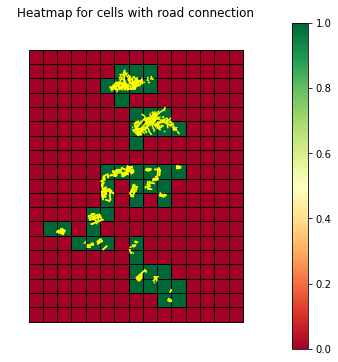

In [2]:
from data_prep_funcs import make_road_heatmap
import geopandas

roads_within = geopandas.read_file("../input_files/roads/roads_all_zones_within.shp")

make_road_heatmap(grid_gdf=grid_gdf,
                      roads_shp=roads_within,
                      extr_x=extr_x,
                      extr_y=extr_y,
                      x_steps=x_steps)

In [116]:
def facspecs(hh_per_fac,
            nb_visits):
    
    service_hours = 12*30
    nom_service = 60/ (nb_visits * hh_per_fac / service_hours ) 
    
    print("one service per ",nom_service," minutes")

facspecs(hh_per_fac=2500,
         nb_visits=4)

one service per  2.16  minutes
